## **Programming for Data Science - Invloeden op de woningwaarde in de provincie Gelderland - Yama Anwari** ##

 *Een onderzoek naar de invloeden die leiden tot een prijsstijging danwel een prijsdaling van de gemiddelde woningwaarde per provincie.* 

## **Inhoudsopgave** ##

 - *Managementsamenvatting*
- 1 *Business Understanding*
- 2 *Data Understanding*
- 3 *Data Preparation*
- 4 *Modelling*
- 5 *Evaluation*
- 6 *Deployment*
-  *Literatuurlijst*
-  *Bijlagen*

## **Managementsamenvatting** ##

In dit onderzoek is geprobeerd om een antwoord te geven op de businessvraag: *welke variabele zijn het meest effectief om maandelijks accuraat te kunnen voorspellen hoeveel de gemiddelde woningwaarde voor de provincie Gelderland zal bedragen. De reden hiervan is omdat het op dit moment een onbekend gegeven is over welke variabelen dit zijn en in hoeverre ze gecorreleerd zijn met de gemiddelde woningwaarde. Om deze vraag te kunnen beantwoorden is er gebruik gemaakt van vijftal datasets / dataframes. Dit zijn onder meer: financieel risico hypotheekschuld, gemiddelde woningwaarde per provincie, het Consumentenprijs Index (CPI) in %, de gemiddelde verkoopprijzen van woningen en het aantal verkochte woningen. 

Uit het onderzoek is naar voren gekomen dat de onderzochte variabelen in drietal categorieeen kunnen worden onderverdeeld, te weten: r-waarde onder de 0.10 wordt ‘klein’ genoemd, tussen 0.10 en 0.30 ‘klein tot gemiddeld’, tussen 0.30 en 0.50 ‘gemiddeld tot groot’ en boven de 0.50 ‘groot’. In dit onderzoek zijn enkel de grote correlaties in opgenomen; Gemiddelde waarde eigen woning (r :0.62), Indexcijfers over verkoopontwikkeling (r : -0.60),Groningen (r :0.94), Friesland (r : 0.98), Limburg (r : 0.97), Zeeland (r : 0.66), Drenthe (r : 0.98), Overijssel (r : 0.95), 
Flevoland (r : 0.81), Zuid-Holland (r : 0.82), Noord-Brabant (r : 0.99) & Utrecht (r : 0.81). De gedachtegang hierbij is dat enkel de grote correlaties van grote invloed zullen zijn op de gemiddelde woningwaarde. 

Deze groot correlererende variabelen zijn ook in tweetal voorspelmodellen verwerkt om de gemiddelde maandelijkse woningwaarde te kunnen voorspellen. Het eerste model, de Random Forrest Regressor, voorspelt de maandelijkse waarden voor 69% accuraat. Het tweede model, de ARIMAX, voorspelt deze waarde voor 75% accuraat. 

De gedachte is dat waarden kunnen nog nauwkeuriger worden voorspeld wanneer de outliers vervangen worden met de gemiddelde waarden en de gemiddeld tot laag correlereende variabelen ook in worden meegenomen in het voorspelmodel. 

In [1]:
# De onderstaande packages moeten worden ingeladen om de bewerkingen alsook de visualisaties te kunnen plotten. 



## **1 Business Understanding** ##


In dit project wordt getracht om een uitspraak te doen over de gemiddelde woningwaarde voor de provincie Gelderland. Om dit mogelijk te maken is er gebruik gemaakt van verschillende datasets / databronnen. Deze databronnen zijn steeds opgehaald en geperepareerd om verdere analyse op uit te kunnen voeren met als uiteindelijk doel om een voorspelmodel te ontwikkellen. Deze preparatiestappen worden in de komende hoofdstukken uitvoerig besproken. Daarnaast wordt na het lezen van dit rapport ook duidelijk hoe men tot een antwoord danwel een conclusie is gekomen. 

**1.1 Aanleiding**

De huizenmarkt is erg in beweging. Tegenwoordig is het kopen van een huis niet meer zo vanzelfsprekend voor iedereen, in het bijzonder voor de starters is dit een erg lastige opgave (Amstelveens Nieuwsblad, 2023). De huisprijs is namelijk afhankelijk van diverse factoren, te denken valt aan; de beleggers die hun heil zoeken in het opkopen van een huis en dat vervolgens verhuren, het belastingvrije schekingsbedrag die de ouders aan hun kinderen overmaken, de stikstofproblemen die de bouw van de huizen bemoeilijken, de immigratiestroom vanuit Oekraine en of oorlogsgebieden. Al met al, er zijn vele factoren die de huisprijs doen verhogen danwel verlagen. Het doel van dit project is om inzicht te krijgen in deze factoren, of beter gezegd deze variabelen.

**1.2 De noodzaak van dit project**

Als starter merken wij, als een werkend stel, hoe lastig het wel niet is om een huis te kunnen bemachtigen / kopen. De bovengenoemde variabelen spelen ook bij ons een rol. Hierdoor weten wij niet waar maar belangrijker, wanneer een huis te kopen. Onze verblijfplek is in provincie Gelderland, wij zijn beiden hier opgegroeid en hebben naast onze vrienden en familie ook ons werk hier. We zouden graag een huis in deze provincie willen kopen. 

Echter, net als de rest van het land zijn de huisprijzen ook in deze provincie erg sterk onderhevig aan prijsschommelingen en fluctiaties. Volgens het Kadaster is de gemiddelde vraagprijs € 511.251 (Kadasterdata, 2023). Het te lenen gemiddelde hypotheekbedrag lag in 2022 voor provincie Gelderland nog op € 321.000 (Business Insider, 2022). Dit betekent dat een gemiddelde huiskoper, zoals ons, gemiddeld bijna voor € 200.000,- ofwel uit eigen inbreng (spaargeld, ouders, familie /vrienden) moet financieren ofwel een nog hoger hypotheekbedrag dient af te sluiten. 

In ons geval is het eerste niet denkbaar, wij hebben vorig jaar een mooi maar vooral een duur bruiloft gegeven, en mijn ouders of vrienden en familie hebben eveneens dat geld niet. Het gevolg is echter wel dat we op dit moment noodgedwonen een huurhuis hebben en wachten op een 'goede tijd', hopende op een flinke prijscorrectie, om een huis te kunnen kopen. 

Het voorspellen van die prijscorrectie en of een gemiddelde woningwaarde voor de provincie Gelderland is op dit moment, net als voor vele andere economen, een terra incognita. Dit wil zeggen een geheel onbekend gegeven, en het doen van een uitspraak daarover is en blijft tasten in het duister. Desondanks, willen we weten in welk jaar en maand het beste men een huis kan kopen. Daarnaast willen we zien op welke wijze het woningaanbod zich in de afgelopen jaren heeft ontwikkeld en hoe het er nu voor staat. 

*Waarom is de gemiddelde woningwaarde per maand per provincie zo belangrijk?*
De gemiddelde woningwaarde is een veelzeggend gegeven, dit cijfer komt onder andere door de gemiddelde verkoopprijs tot stand (RTL Z, 2023). De gemiddelde verkoopprijs komt vervolgens door het vraag en aanbod-principe tot stand. Het voorspellen of de gemiddelde woningwaarde per maand stijgt danwel daalt, heeft logischerwijs ook consequenties voor de vraag- verkoopprijs. Om deze reden wordt de focus voor dit onderzoek gelegd in het achterhalen van de betreffende variabelen, welke sterk gecorreleerd zijn met de gemiddelde woningwaarde.  Dit is nodig om uiteindelijk accurraat te kunnen voorspeellen.

Dit project heeft dus een tweeledige motivatie; enerzijds is het hartstikke interessant om een voorspelling over de gemiddelde woningwaarde te kunnen doen en anderzijds, de resultaten van dit project kunnen wij hopelijk ook privé gebruiken. Op basis van deze kennis en inzichten worden wij in staat gesteld om in het gesprek met een hypotheekadviseur een weloverwogen beslissing te nemen bij het kopen van een huis in provincie Gelderland. 

**1.3 Probleemstelling**

*Businessvraag:*

*"Welke variabelen correleren het hoogst met de gemiddelde woningwaarde in de provincie Gelderland, om teneinde deze variabelen in een voorspelmodel te integreregen om zodanig de gemiddelde woningwaarde per maand te kunnen voorspellen?"*

## **2 Data Understanding** ##

Om de bovengenoemde businessvraagstuk te kunnen beantwoorden, is er gebruik gemaakt van de verschillende databronnen. In deze databronnen, ook wel bekend als datasets, zitten tevens de verschillende variabelen in verwerkt. Deze variabelen zullen bij het bewerken van elke dataset kort worden toegelicht om de relevantie ervan kenbaar te maken.

**2.1 Onderzoeksmodel**

Hieronder is het onderzoeksmodel opgenomen om kenbaar te maken van welke databronnen, variabelen, preparatiehandelingen en voorspelmodellen er gebruik  is gemaakt. Daarna worden de variabelen in kwestie toegelicht. Belangrijk om te weten is dat de data voor het het minen van al deze variabelen enkel tot en met januari 2020 gaan. Er is bewust gekozen om de data na deze tijd voor het opstellen van het voorspelmodel buiten beschouwing te laten. De voornaamste reden vormt: het uitsluiten van COVID-19 effecten. Ongeveer in februari / maart waren de effecten van de coronapandemie zichtbaar, met als gevolg dat veel data vervuild / vertroebeld is geraakt. Dit geldt ook voor de datasets, e.g., CPI, die gebruikt worden voor dit onderzoek. Om een zuiverdere voorspelling te kunnen maken, is alle data na deze periode voor dit onderzoek buiten beschouwing gelaten. 

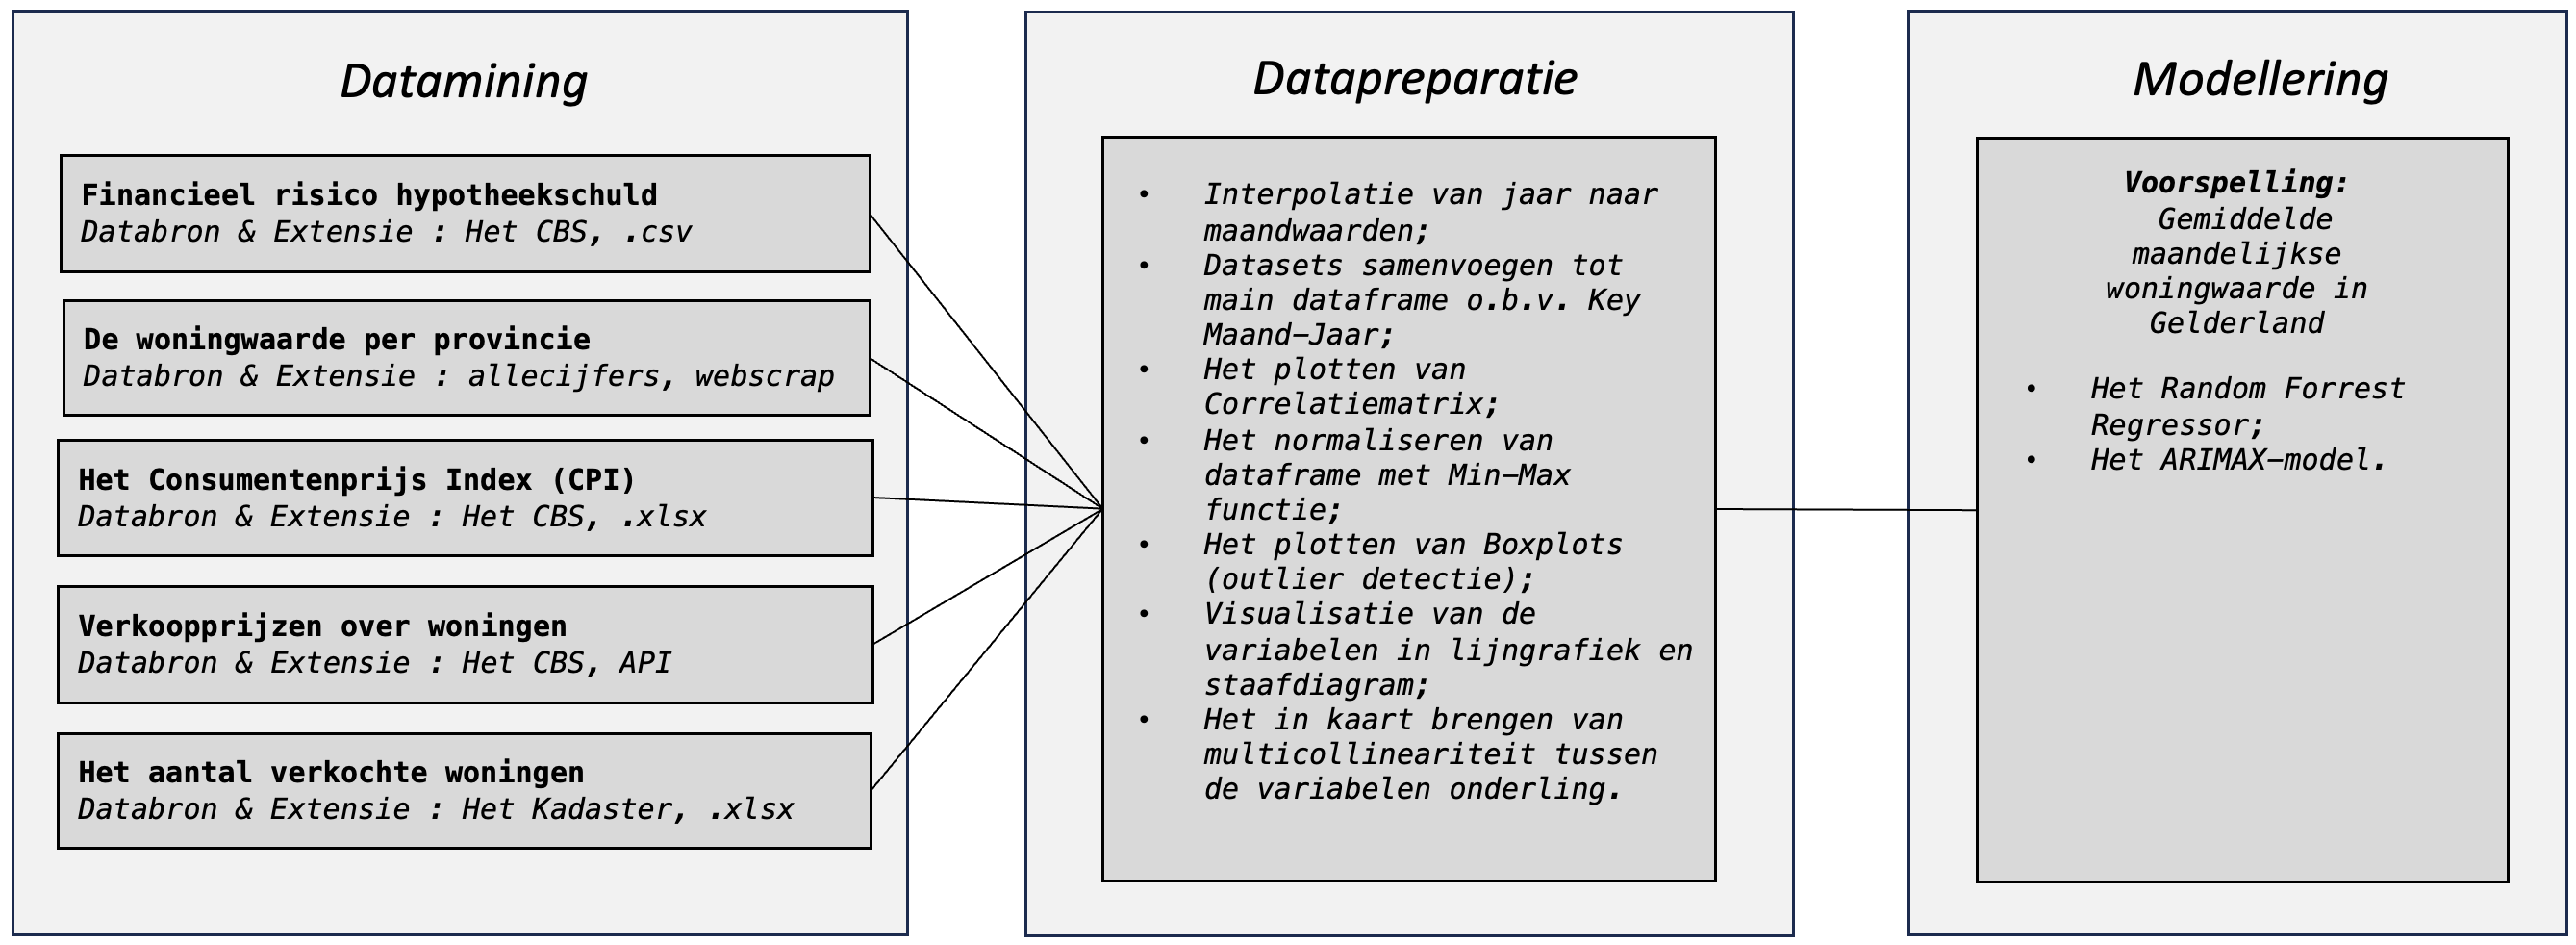

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

# Het weergeven van het onderzoeksmodel

# Het pad naar het PNG-bestand
bestand_pad = os.path.join('Datasets/Origineel/Het Onderzoekmodel.png')

# Controleren of het bestand bestaat
if os.path.exists(bestand_pad):
    # De afbeelding weergeven in de Markdown-cel
    display(Image(filename=bestand_pad))
else:
    print("Het PNG-bestand kan niet worden gevonden op het opgegeven pad.")

**2.2 Dataframes**

Hieronder worden de gebruikte datasets, hierna als dataframe benoemd, kort toegelicht: 

- *Financieel_Risico_Hypotheekschuld:* 
Deze dataframe heeft een .csv als extensie en is afkomstig vanuit het CBS (CBS, 2023). Deze dataframe bevat gegevens over het financieel risico van eigenwoningbezitters door hypotheekschuld, woningwaarde en inkomen aan elkaar te relateren.

- *Dataframe_Jaartallen_Maanden:* 
Deze dataframe is aangemaakt middels een functie om de jaartallen en maanden in een dataframe te krijgen. Niet alle ingewonnen dataframes beschikken over maanden, middels het gebruiken van deze functie kan er aan elke dataset een maand worden toegekend. Deze maand i.c.m. jaartal is van belang om een unieke Key te maken waarmee alle dataframes met elkaar tot main dataframe worden gemerged. 

- *Woningwaarde_Per_Provincie:* 
Deze HTML-dataset (webscrapping) bevat de gemiddelde woningwaarde per provincie in Nederland. De woningwaarde is gebaseerd op de gemiddelde WOZ waarde in 2022.

- *Het ConsumentenprijsIndex (CPI) in %:* 
Deze dataset (.xlsx) bevat Indexcijfer dat het prijsverloop weergeeft van een pakket goederen en diensten zoals dit gemiddeld wordt aangeschaft door alle huishoudens in Nederland (Allecijfers, 2023).

- *De Verkoopprijzen over woningen:* 
Deze dataset (API) bevat de gemiddelde verkoopprijs welke tot stand is gekomen door gebruik te maken van de koopakten die bij het Kadaster worden geregistreerd (CBS, 2023).

- *Het aantal verkochte woningen:* 
Deze dataset (.xlsx) bevat het totaal aantal verkochte woningen per provincie per maand (Kadaster, 2023). 

## **3 Data Preparation** ##

In dit hoofdstuk komt de datapreparatiestap aan bod. Deze stap is het meest tijdsintensieve en bewerkelijke stap binnen het CRISP-DM model. In hoofdstuk twee was te lezen welke variabelen uit de genoemde dataframes (datasets) gebruikt worden om de gestelde businessvraag te beantwoorden; het maandelijks kunnen voorspellen van de gemiddelde woningwaarde voor de provincie Gelderland. In dit hoofdstuk wordt elke dataframe met inbegrip van de variabelen, kort toegelicht en daarna volgen de preparatiebewerkingen. De bewerkingen volgen vlak na de toelichting en zijn in Python script weergeven.

**3.1 Financieel_Risico_Hypotheekschuld**

Deze csv-dataframe bevat gegevens over het financieel risico van eigenwoningbezitters door hypotheekschuld, woningwaarde en inkomen aan elkaar te relateren. De uitkomsten worden uitgesplitst naar kenmerken als samenstelling van het huishouden, leeftijd van de hoofdkostwinner, voornaamste inkomensbron, en inkomens- en vermogensgroepen. Uit deze dataframe wordt enkel de hypotheekschuld / woningwaarde gehaald. 

De gedachtegang hierbij is dat wanneer de hypotheekschuld versus woningwaarde toeneemt, dat dit kengetal een negatief impact zal hebben op de woningwaarde. Om een woning te kunnen kopen moeten kopers immers meer of een hoger hypotheekschuld gaan nemen. Deze hoge schuld kan ervoor zorgen dat de kopers huiveriger worden met het aankopen van een huis waardoor er meer huisaanbod op de markt komt. En vanuit het vraag- en aanbodprincipe zou dit dus de gemiddelde woningwaarde kunnen doen verlagen. De gemiddelde woningwaarde komt immers ook door de gemiddelde verkoopprijs tot stand (RTL Z, 2013). 
In dit geval wordt dus enkel het eerste kengetal meegenomen. De data is op jaarniveau en gaat vanaf 2006 tot en met 2020. Onderstaande bewerkingen worden uitgevoerd en daarna worden de jaarcijfers naar maandwaarden geinterpoleerd. 

In [1]:
import pandas as pd
import numpy as np

#dataframe wordt van de locatie opgehaald en weergeven
Financieel_Risico_Hypotheekschuld = pd.read_csv("Datasets/Origineel/Financieel_risico_hypotheekschuld__eigenwoningbezitters_23052022_211613.csv", sep=";", on_bad_lines="skip")

# meerdere onnodige kolommen worden verwijderd
# Selecteren van meerdere rijen met iloc
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.iloc [:3]

# Draai het dataframe
# de dataframe wordt omgedraaid om het makkelijker te maken om mee te kunnen werken. 
Financieel_Risico_Hypotheekschuld = pd.melt(Financieel_Risico_Hypotheekschuld, id_vars=['Onderwerp', 'Perioden'], var_name='Jaartal', value_name='Waarde')

# de komma's worden vervangen door een punt om het om te kunnen zetten in een float.
Financieel_Risico_Hypotheekschuld['Waarde'] = Financieel_Risico_Hypotheekschuld['Waarde'].str.replace(',', '.')

# Er wordt een pivotable aangemaakt om de categorieeen te plaatsen.
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.pivot_table('Waarde', index = 'Jaartal', columns ='Onderwerp')

#de eerste rij wordt verwijderd
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.rename_axis(None, axis=0)

# Er wordt een nieuwe rij met jaartallen van 2006 tot en met 2020 aangemaakt
new_row = pd.DataFrame({'Jaartal': range(2006, 2021)})

# Er wordt een nieuwe rij aan het bestaande DataFrame toegevoegd.
Financieel_Risico_Hypotheekschuld = pd.concat([Financieel_Risico_Hypotheekschuld, new_row], ignore_index=True)

# Vul NaN-waarden in kolom 'Jaartal' op met jaartallen van 2006 tot en met 2020
start_year = 2006
end_year = 2020
years = range(start_year, end_year + 1)
Financieel_Risico_Hypotheekschuld['Jaartal'].fillna(pd.Series(years), inplace=True)

# Verwijder NaN-waarden uit het DataFrame
Financieel_Risico_Hypotheekschuld= Financieel_Risico_Hypotheekschuld.dropna()

# Verplaats kolom 'B' naar de eerste positie
Financieel_Risico_Hypotheekschuld.insert(0, 'Jaartal', Financieel_Risico_Hypotheekschuld.pop('Jaartal'))

# het punt op het einde van het jaartal alsook het type wordt omgezet naar een hele integer.
Financieel_Risico_Hypotheekschuld['Jaartal'] = Financieel_Risico_Hypotheekschuld['Jaartal'].round().astype(int)

**2.4 Dataframe Jaartal & Maanden**

Deze dataframe heeft als doel om aan een jaar een maand toe te kennen. Deze jaar/maandcombinatie is nodig om de waarden per maand te kunnen weergeven maar belangrijker, om de dataframes met elkaar te kunnen mergen. Er wordt een Key aangemaakt welke bestaat uit maand+jaar. Middels deze unieke Key kunen verschillende dataframes gemerged worden met elkaar. 

In [2]:
import pandas as pd

# Dataframe met jaartallen en maanden
def create_year_month_dataframe():

#  Deze functie heeft als doel om tweetal kolommen aan te maken om per jaar de betreffende maand te vermelden. 
#   Deze twee kolommen zijn belangrijk om later de dataframes te kunnen mergen.

    years = list(range(2006, 2021))
    months = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']
    dates = []

    for year in years:
        for month in months:
            dates.append(f"{year} {month}")

    df = pd.DataFrame({'Datum': dates})
    return df

# Gebruik de functie om een DataFrame te maken
Jaartal_maand = create_year_month_dataframe()

# Splits het woord en het getal in aparte kolommen
Jaartal_maand[['Jaartal', 'Maand']] = Jaartal_maand['Datum'].str.split(n=1, expand=True)

# specifieke kolommen 'Jaartal' en 'Maand' worden met met loc geselecteerd
Jaartal_maand = Jaartal_maand.loc[:, ['Jaartal', 'Maand']]


**2.5 De woningwaarde per provincie**


Deze dataset bevat de gemiddelde woningwaarde per provincie. Er zijn 12 provincies in Nederland waarvoor de gegevens over de gemiddelde woningwaarde bekend zijn. Deze waarden zijn op jaarbasis gepubliceerd, dit wil zeggen dat ook deze waarden naar maandniveau worden geinterpoleerd. De gedtachtegang hierbij is dat wanneer er verwachting is dat de gemiddelde woningwaarde gaat dalen, dat dit ook een negatieve impact op de verkoopprijs zal hebben. En wanneer de gemiddelde woningwaarde stijgt, dat dit de andere kant op werkt. In dat geval neemt de betaalbaarheid van een koopwoning toe danwel af. 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Dataframe over woningwaarden

# URL of the webpage to scrape
url = "https://allecijfers.nl/ranglijst/gemiddelde-woningwaarde-per-provincie-in-nederland/"

# Send a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the data
table = soup.find("table")

# Extract the table headers
headers = [th.text.strip() for th in table.find_all("th")]

# Extract the table rows
data = []
for tr in table.find_all("tr"):
    row = [td.text.strip() for td in tr.find_all("td")]
    if row:
        data.append(row)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=headers)

# Draai het dataframe om met behulp van transpose().
df_transposed = df.transpose()

# Bijwerk de kolomnamen met waarden van de tweede rij.
df_transposed.columns = df_transposed.iloc[0]

# Verwijder de eerste rij, deze rij bevat nu lege waarden. 
df_transposed = df_transposed.iloc[1:]

# Verander de kolomnaam 'Provincie' naar 'Jaartal'
df_transposed  = df_transposed .rename(columns={'Provincienaam': 'Jaartal'})

# Verwijder het euroteken uit alle rijen in het dataframe
df_transposed = df_transposed.applymap(lambda x: x.replace('€', ''))

# Verwijder het puntteken uit alle rijen in het dataframe
df_transposed = df_transposed.applymap(lambda x: x.replace('.', ''))

# Wijzig het datatype van alle kolommen naar integer
df_transposed = df_transposed.astype(int)

# Verwijder rijen met waarden tussen 1 en 12
df_transposed = df_transposed[~df_transposed.apply(lambda row: row.between(1, 12)).any(axis=1)]

# Voeg jaartallen toe aan de DataFrame
years = range(2022, 1996, -1)
df_transposed['Jaartal'] = years

# Kolomtype omzetten naar integer
df_transposed['Jaartal'] = df_transposed['Jaartal'].astype(int)

# Haal de gewenste kolom uit de DataFrame
Jaartal = df_transposed.pop('Jaartal')

# Voeg de gewenste kolom op de gewenste positie toe aan de DataFrame
df_transposed.insert(0, 'Jaartal', Jaartal)

# Sorteer de waarden in de kolom oplopend
df_sorted = df_transposed.sort_values('Jaartal')

Woningwaarde_Provincies = df_sorted

**2.6 Main Dataframe**

Dit vormt de main dataframe, dit wil zeggen dat wanneer alle andere dataframes met elkaar worden gemerged, dat het tot deze dataframe leidt. Deze dataframe wordt gebruikt om verdere analyses en bewerkingen op te doen. En elke nieuwe dataframe wordt middels de aangemaakt Key tot deze main dataframe gemerged. 

In [4]:
# Main Dataframe
# Het samenvoegen van de twee dataframes: Jaartal_maand + Financieel_Risico_Hypotheekschuld

# Specifieke kolommen omzetten naar integers
Financieel_Risico_Hypotheekschuld['Jaartal'] = Financieel_Risico_Hypotheekschuld['Jaartal'].astype(int)
Woningwaarde_Provincies['Jaartal'] = Woningwaarde_Provincies['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_2 = pd.merge(Financieel_Risico_Hypotheekschuld, Woningwaarde_Provincies, on='Jaartal', validate='m:m')

# Specifieke kolommen omzetten naar integers
main_df_2['Jaartal'] = main_df_2['Jaartal'].astype(int)
Jaartal_maand['Jaartal'] = Jaartal_maand['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_2 = pd.merge(main_df_2, Jaartal_maand, on='Jaartal', validate='m:m')

# Specifieke kolommen omzetten naar integers
main_df_2['Jaartal'] = main_df_2['Jaartal'].astype(int)
Jaartal_maand['Jaartal'] = Jaartal_maand['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df = pd.merge(Jaartal_maand, main_df_2, on='Jaartal', validate='m:m')

# Waarde van 'Kolom' omzetten naar integer
main_df['Jaartal'] = main_df['Jaartal'].astype(str)

# Nieuwe kolom aanmaken met waarden uit twee andere kolommen
main_df['Key'] = main_df['Jaartal'].astype(str) + main_df['Maand_x'].astype(str)

## Duplicaten verwijderen binnen kolom Key
main_df = main_df.drop_duplicates(subset='Key')


***2.6.1 Interpolatie jaarcijfers naar maandwaarden***

Zoals in het voorgaande hoofdstuk aangegeven, om uiteindelijk op maandniveau te kunnen voorspellen, worden de jaarwaarden naar maandwaarden geinterpoleerd. Hieronder de bewerkignen in code. 

In [5]:
## interpolatie van ontbrekende velden

# Samenvoegen van Jaartal en met alle kolommen met een scheidingsteken
# Het doel hiervan is om de dubbele waarden dan te kunnen verwijderen, op dit moment kan dat niet omdat eenzelfde waarde ook over andere jaren / perioden voor kan komen. 
# Hierdoor worden de waarden ook uit andere jaren verwijderd omdat ze als dubbel worden gezien. Door de waarde uit een kolom met het betreffende jaartal te combineren worden de waarden per jaar uniek.
main_df['Gemiddelde hypotheekschuld eigen woning'] = main_df['Jaartal'].astype(str) + '-' + main_df['Gemiddelde hypotheekschuld eigen woning'].astype(str)
main_df['Particuliere huishoudens'] = main_df['Jaartal'].astype(str) + '-' + main_df['Particuliere huishoudens'].astype(str)
main_df['Gemiddelde waarde eigen woning'] = main_df['Jaartal'].astype(str) + '-' + main_df['Gemiddelde waarde eigen woning'].astype(str)
main_df['Noord-Holland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Noord-Holland'].astype(str)
main_df['Utrecht'] = main_df['Jaartal'].astype(str) + '-' + main_df['Utrecht'].astype(str)
main_df['Noord-Brabant'] = main_df['Jaartal'].astype(str) + '-' + main_df['Noord-Brabant'].astype(str)
main_df['Zuid-Holland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Zuid-Holland'].astype(str)
main_df['Gelderland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Gelderland'].astype(str)
main_df['Flevoland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Flevoland'].astype(str)
main_df['Overijssel'] = main_df['Jaartal'].astype(str) + '-' + main_df['Overijssel'].astype(str)
main_df['Drenthe'] = main_df['Jaartal'].astype(str) + '-' + main_df['Drenthe'].astype(str)
main_df['Zeeland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Zeeland'].astype(str)
main_df['Limburg'] = main_df['Jaartal'].astype(str) + '-' + main_df['Limburg'].astype(str)
main_df['Friesland'] = main_df['Jaartal'].astype(str) + '-' + main_df['Friesland'].astype(str)
main_df['Groningen'] = main_df['Jaartal'].astype(str) + '-' + main_df['Groningen'].astype(str)

# Het interpoleren van de main dataframe
# Leegmaken van duplicaten over alle 'Kolommen'
main_df.loc[main_df['Particuliere huishoudens'].duplicated(), 'Particuliere huishoudens'] = ''
main_df.loc[main_df['Gemiddelde hypotheekschuld eigen woning'].duplicated(), 'Gemiddelde hypotheekschuld eigen woning'] = ''
main_df.loc[main_df['Gemiddelde waarde eigen woning'].duplicated(), 'Gemiddelde waarde eigen woning'] = ''
main_df.loc[main_df['Noord-Holland'].duplicated(), 'Noord-Holland'] = ''
main_df.loc[main_df['Utrecht'].duplicated(), 'Utrecht'] = ''
main_df.loc[main_df['Noord-Brabant'].duplicated(), 'Noord-Brabant'] = ''
main_df.loc[main_df['Zuid-Holland'].duplicated(), 'Zuid-Holland'] = ''
main_df.loc[main_df['Gelderland'].duplicated(), 'Gelderland'] = ''
main_df.loc[main_df['Flevoland'].duplicated(), 'Flevoland'] = ''
main_df.loc[main_df['Overijssel'].duplicated(), 'Overijssel'] = ''
main_df.loc[main_df['Drenthe'].duplicated(), 'Drenthe'] = ''
main_df.loc[main_df['Zeeland'].duplicated(), 'Zeeland'] = ''
main_df.loc[main_df['Limburg'].duplicated(), 'Limburg'] = ''
main_df.loc[main_df['Friesland'].duplicated(), 'Friesland'] = ''
main_df.loc[main_df['Groningen'].duplicated(), 'Groningen'] = ''

# Dataframe voor de interpolatie
main_df_before_interpolation = main_df.copy()
main_df_before_interpolation['Particuliere huishoudens'] = main_df['Particuliere huishoudens'].str.split('-').str[1]
main_df_before_interpolation['Gemiddelde hypotheekschuld eigen woning'] = main_df['Gemiddelde hypotheekschuld eigen woning'].str.split('-').str[1]
main_df_before_interpolation['Gemiddelde waarde eigen woning'] = main_df['Gemiddelde waarde eigen woning'].str.split('-').str[1]
main_df_before_interpolation['Noord-Holland'] = main_df['Noord-Holland'].str.split('-').str[1]
main_df_before_interpolation['Utrecht'] = main_df['Utrecht'].str.split('-').str[1]
main_df_before_interpolation['Noord-Brabant'] = main_df['Noord-Brabant'].str.split('-').str[1]
main_df_before_interpolation['Zuid-Holland'] = main_df['Zuid-Holland'].str.split('-').str[1]
main_df_before_interpolation['Gelderland'] = main_df['Gelderland'].str.split('-').str[1]
main_df_before_interpolation['Flevoland'] = main_df['Flevoland'].str.split('-').str[1]
main_df_before_interpolation['Overijssel'] = main_df['Overijssel'].str.split('-').str[1]
main_df_before_interpolation['Drenthe'] = main_df['Drenthe'].str.split('-').str[1]
main_df_before_interpolation['Zeeland'] = main_df['Zeeland'].str.split('-').str[1]
main_df_before_interpolation['Limburg'] = main_df['Limburg'].str.split('-').str[1]
main_df_before_interpolation['Friesland'] = main_df['Friesland'].str.split('-').str[1]
main_df_before_interpolation['Groningen'] = main_df['Groningen'].str.split('-').str[1]

# Kolomtype veranderen naar integer

# Rijen tot en met 172 verwijderen, dit vanwege het feit dat de waarde enkel tot en met januari 2020 gaat. 
# Op de resterende maanden kunnen niet worden geinterpoleerd. Omdat er geen data beschikbaar is.
main_df_before_interpolation = main_df_before_interpolation.iloc[:169, :]

# Kolomtype veranderen naar integer met controle op geldige gehele getallen
main_df_before_interpolation['Particuliere huishoudens'] = np.floor(pd.to_numeric(main_df_before_interpolation['Particuliere huishoudens'], errors='coerce')).astype('float').round(2)
main_df_before_interpolation['Gemiddelde hypotheekschuld eigen woning'] = np.floor(pd.to_numeric(main_df_before_interpolation['Gemiddelde hypotheekschuld eigen woning'], errors='coerce')).astype('float').round(2)
main_df_before_interpolation['Gemiddelde waarde eigen woning'] = np.floor(pd.to_numeric(main_df_before_interpolation['Gemiddelde waarde eigen woning'], errors='coerce')).astype('float').round(1)
main_df_before_interpolation['Noord-Holland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Noord-Holland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Utrecht'] = np.floor(pd.to_numeric(main_df_before_interpolation['Utrecht'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Noord-Brabant'] = np.floor(pd.to_numeric(main_df_before_interpolation['Noord-Brabant'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Zuid-Holland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Zuid-Holland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Gelderland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Gelderland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Flevoland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Flevoland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Overijssel'] = np.floor(pd.to_numeric(main_df_before_interpolation['Overijssel'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Drenthe'] = np.floor(pd.to_numeric(main_df_before_interpolation['Drenthe'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Zeeland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Zeeland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Limburg'] = np.floor(pd.to_numeric(main_df_before_interpolation['Limburg'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Friesland'] = np.floor(pd.to_numeric(main_df_before_interpolation['Friesland'], errors='coerce')).astype('float').round(0)
main_df_before_interpolation['Groningen'] = np.floor(pd.to_numeric(main_df_before_interpolation['Groningen'], errors='coerce')).astype('float').round(0)

# Interpolatie van waarden binnen de kolommen
main_df_after_interpolation = main_df_before_interpolation.copy()
main_df_after_interpolation['Particuliere huishoudens'] = main_df_before_interpolation['Particuliere huishoudens'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Gemiddelde hypotheekschuld eigen woning'] = main_df_before_interpolation['Gemiddelde hypotheekschuld eigen woning'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Gemiddelde waarde eigen woning'] = main_df_before_interpolation['Gemiddelde waarde eigen woning'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Noord-Holland'] = main_df_before_interpolation['Noord-Holland'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Utrecht'] = main_df_before_interpolation['Utrecht'].interpolate(method='linear').round(0)
main_df_after_interpolation['Noord-Brabant'] = main_df_before_interpolation['Noord-Brabant'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Zuid-Holland'] = main_df_before_interpolation['Zuid-Holland'].interpolate(method='cubic').round(0)      
main_df_after_interpolation['Gelderland'] = main_df_before_interpolation['Gelderland'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Flevoland'] = main_df_before_interpolation['Flevoland'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Overijssel'] = main_df_before_interpolation['Overijssel'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Drenthe'] = main_df_before_interpolation['Drenthe'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Zeeland'] = main_df_before_interpolation['Zeeland'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Limburg'] = main_df_before_interpolation['Limburg'].interpolate(method='cubic').round(0)
main_df_after_interpolation['Friesland'] = main_df_before_interpolation['Friesland'].interpolate(method='cubic').round(0)                                          
main_df_after_interpolation['Groningen'] = main_df_before_interpolation['Groningen'].interpolate(method='cubic').round(0)

In [8]:
# Hier gebleven!!
#Mogelijkelijk werkt deze code ook goed! dit moet nog getest worden.

# columns = [
#     'Particuliere huishoudens',
#     'Gemiddelde hypotheekschuld eigen woning',
#     'Gemiddelde waarde eigen woning',
#     'Noord-Holland',
#     'Utrecht',
#     'Noord-Brabant',
#     'Zuid-Holland',
#     'Gelderland',
#     'Flevoland',
#     'Overijssel',
#     'Drenthe',
#     'Zeeland',
#     'Limburg',
#     'Friesland',
#     'Groningen'
# ]

# # Interpolatie van ontbrekende velden
# for column in columns:
#     main_df[column] = main_df['Jaartal'].astype(str) + '-' + main_df[column].astype(str)
#     main_df.loc[main_df[column].duplicated(), column] = ''
#     main_df_before_interpolation[column] = main_df[column].str.split('-').str[1]
#     main_df_before_interpolation[column] = np.floor(pd.to_numeric(main_df_before_interpolation[column], errors='coerce')).astype('float').round(0)
#     main_df_after_interpolation[column] = main_df_before_interpolation[column].interpolate(method='cubic').round(0)


In [6]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_interpolation.to_excel(desktop_path + 'Python_test.xlsx', index=False)

**2.7 Het Consumentenprijs Index (CPI) in %**

De consumentenprijsindex (CPI) geeft de prijsontwikkeling weer van goederen en diensten die worden gekocht door huishoudens in Nederland. De prijzen van deze producten veranderen eigenlijk het hele jaar door. Sommige prijzen stijgen en sommige dalen. Hoe deze prijzen veranderen, wordt in de gaten gehouden door het Centraal Bureau voor Statistiek (CBS). Deze Nederlandse instantie berekent het consumentenprijsindex om zo de inflatie of deflatie in een jaar vast te stellen.

Het CBS publiceert maandelijks over de prijsontwikkeling van goederen en diensten die consumenten aanschaffen. De jaarmutatie van de consumentenprijsindex (CPI) is een belangrijke indicator voor de inflatie en wordt berekend als de procentuele verandering van de CPI in de verslagmaand ten opzichte van een jaar eerder (Centraal Bureau voor de Statistiek, 2023). 

De gedachte bij het gebruik van deze xlsx-dataframe is dat wanneer het CPI toeneemt, dat dit een negatief effect zal hebben op de gemiddelde woningwaarde. De woning wordt immers minder waard vanwege de inflatie en hierdoor dienen de kopers een hoger bedrag te betalen. Tegelijkertijd daalt de koopkracht ook, dit wil zeggen dat de kopers met hetzelfde geld een woning met minder waarde kunnen aanschaffen. De verwachting is dat het hoge danwel lage CPI invloed zal hebben op de gemiddelde woningwaarde. De hoge CPI zal uiteindelijk ook een negatief effect op het verkochte aantal woningen hebben, welke eveneens de gemiddelde woningwaarde kan doen dalen. 

In [6]:
# De file over CPI wordt opgehaald vanuit de locatie en wordt als dataframe opgeslagen. 
CBS_CPI = pd.read_excel("Datasets/Origineel/CBS_CPI.xlsx", sheet_name='Blad1')

# Woorden splitsen in aparte kolommen
CBS_CPI[['Jaartal', 'Maand']] = CBS_CPI['Jaartallen'].str.split(' ', n=1, expand=True)

# Selecteer kolommen 'A' en 'C'
CBS_CPI = CBS_CPI[['Jaartallen', 'CPI_%', 'Jaartal', 'Maand']]

# Nieuwe kolom aanmaken met waarden uit twee andere kolommen
CBS_CPI['Key'] = CBS_CPI['Jaartal'].astype(str) + CBS_CPI['Maand'].astype(str)

column_name = 'Key'  # De naam van de kolom die je wilt verplaatsen
CBS_CPI[column_name] = CBS_CPI.pop(column_name)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_after_merged = pd.merge(main_df_after_interpolation, CBS_CPI, on='Key', validate='m:m')

# dubbele kolommen worden verwijderd
columns_to_remove = ['Maand_x', 'Jaartal_y']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.
main_df_after_merged = main_df_after_merged.drop(columns_to_remove, axis=1)

column_name = 'Key'  # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)


In [7]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_merged.to_excel(desktop_path + 'Python_test.xlsx', index=False)

**2.8 De verkoopprijzen over woningen**

Het CBS en het Kadaster meten de prijsontwikkeling van alle bestaande koopwoningen in Nederland en maken gebruik van de koopakten die bij het Kadaster worden geregistreerd. Bij het gebruik van deze API-dataframe is de gedachtegang dat wanneer de gemiddelde verkooprijzen dalen, dit eveneens een negatief effect zal hebben op de woningwaarde. 

In [7]:
import requests
import pandas as pd

# De URL van de CBS Open Data API
url = 'https://opendata.cbs.nl/ODataApi/odata/83906NED/TypedDataSet'

# Een GET-verzoek naar de API
response = requests.get(url)

# Controleer de status van het antwoord
if response.status_code == 200:
    # Haal de gegevens op in JSON-indeling
    data = response.json()
    
    # Converteer de gegevens naar een DataFrame
    df = pd.DataFrame(data['value'])
    
else:
    print('Fout bij het ophalen van de gegevens. Statuscode:', response.status_code)

# Enkel de onderstaande kolommen lijken interessant om mee te nemen in de dataframe. 
API_CBS_Verkoopprijzen = df.loc[:, ['Perioden', 'OntwikkelingTOVEenJaarEerder_6', 'AantalVerkochteWoningen_4', 'GemiddeldeVerkoopprijs_7', 'TotaleWaardeVerkoopprijzen_8']]

# Er worden alleen de jaren met maanden overgelaten en de overige waarden uitgehaald. Dit omdat de andere Dataframe's ook over deze waarden beschikken. 
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[API_CBS_Verkoopprijzen['Perioden'].str.len() > 4] # eerst wordt een selectie gemaakt om alle jaartallen eruit te halen, dus waarden boven 4.
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[API_CBS_Verkoopprijzen['Perioden'].str.len() < 16] # dan wordt er een selectie gemaakt om de jaartallen met kwartalen uit te halen.

#Verwijder rijen waarin "KW" voorkomt in de kolom 'Perioden', dit zijn de kwartaalcijfers
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[~API_CBS_Verkoopprijzen['Perioden'].str.contains('KW')]

#Verwijder rijen waarin "JJ" voorkomt in de kolom 'Perioden', dit zijn de totale jaarcijfers
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[~API_CBS_Verkoopprijzen['Perioden'].str.contains('JJ')]

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen[['Jaartal', 'Maandnummer']] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{4})(\d{2})', expand=True)

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen['Jaartal'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('(\d{4})', expand=False)
API_CBS_Verkoopprijzen['Maandnummer'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{2})', expand=False)

import pandas as pd

# Bepaal het maximale aantal rijen op basis van de index
max_rows = df.index.max()

# De dataframe heeft geen maanden, enkel de nummering ervan. Daarom wordt de onderstaande DF gemaakt.
# Lijst van maanden
maanden = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']

# Voeg een nieuwe kolom 'Maand' toe en vul deze met de maanden
API_CBS_Verkoopprijzen['Maand'] = pd.Series([maanden[(i - 1) % 12] for i in range(1, max_rows + 1)])

# Split 'Perioden' in 'Jaartal' en 'Maandnummer' om het vervolgens te kunnen mappen. 
API_CBS_Verkoopprijzen[['Jaartal', 'Maandnummer']] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{4})(\d{2})', expand=True)

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen['Jaartal'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('(\d{4})', expand=False)
API_CBS_Verkoopprijzen['Maandnummer'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{2})', expand=False)

# Maandnummers naar maandnamen mappen
maandnamen = {
    '01': 'januari',
    '02': 'februari',
    '03': 'maart',
    '04': 'april',
    '05': 'mei',
    '06': 'juni',
    '07': 'juli',
    '08': 'augustus',
    '09': 'september',
    '10': 'oktober',
    '11': 'november',
    '12': 'december'
}
API_CBS_Verkoopprijzen['Maand'] = API_CBS_Verkoopprijzen['Maandnummer'].map(maandnamen)

# Key-kolom aanmaken met waarden uit twee andere kolommen, om de df later te kunnen mergen met main df.
API_CBS_Verkoopprijzen['Key'] = API_CBS_Verkoopprijzen['Jaartal'].astype(str) + API_CBS_Verkoopprijzen['Maand'].astype(str)

# De ondertaande kolomnamen worden aangepast om het werken en begrip gemakkelijker te maken.
new_column_names = {
    'OntwikkelingTOVEenJaarEerder_6': 'Indexcijfers_Over_Verkoopontwikkeling',
    'AantalVerkochteWoningen_4': 'Aantal_Verkochte_Woningen',
    'GemiddeldeVerkoopprijs_7': 'Gemiddelde_Verkoopprijs',
    'TotaleWaardeVerkoopprijzen_8': 'Totale_Waarde_Verkoopprijzen'
}
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen.rename(columns=new_column_names)

column_name = 'Key'  # De naam van de kolom die je wilt verplaatsen
API_CBS_Verkoopprijzen[column_name] = API_CBS_Verkoopprijzen.pop(column_name)

# Merge uitvoeren op de aangepaste kolommen obv aangemaakte Key Jaartal en Maand
main_df_after_merged = pd.merge(main_df_after_merged, API_CBS_Verkoopprijzen, on='Key', validate='m:m')

# Dubbele kolommen worden verwijderd
#columns_to_remove = ['Maand_x', 'Maand_y', 'Jaartal_y'] 

#main_df_after_merged = main_df_after_merged.drop(columns_to_remove, axis=1)

column_name = 'Key'  # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)

In [11]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_merged.to_excel(desktop_path + 'Python_test.xlsx', index=False)

**2.9 Het aantal verkochte woningen**

Deze .xlsx dataframe is afkomstig vanuit het Kadaster en bevat het aantal verkochten woningen per jaar, kwartaal en maand (Kadaster, 2023). Het minen van deze dataset is van belang om uiteindelijk in kaart te kunnen brengen in hoeverre het aantal verkochte woningen een positief dan wel een negatief effect hebben op de gemiddelde woningwaarde in provincie Gelderland. De gedachtegang hierbij is dat wanneer er minder huizen gekocht worden, dan zal de woningwaarde gaan dalen. En wanneer er meer huizen worden verkocht, dat het dan de andere kant op gaat. De vraag en het aanbobod principe zou dan gaan gelden. 

Hieronder de variabelen die deeluitmaken van de dataset. 
- Perioden:	Dit zijn de samengevoegde jaar & maandcijfers van het aantal verkochten woningen. 
- Periode (maand): Dit zijn de maandcijfers binnen elk jaar van het aantal verkochten woningen. 
- Totaal: dit zijn de totale cijfers van alle kolommen. 
- De onderstaande variabelen spreken voor zich: 
    - 2-onder-1-kap	   
    - Appartement	
    - Hoekwoning	
    - Onbekend	
    - Tussenwoning	
    - Vrijstaand


In [8]:
# Type Verkochte Woningen
# De file wordt opgehaald vanuit de locatie. 
Totaal_Aantal_Verkochte_Woningen = pd.read_excel("Datasets/Origineel/Kadaster_Aantal+geregistreerde+verkochte+woningen.xlsx", sheet_name='Aantal woningen')

# Nu worden de jaartallen en Maanden val elkaar gesplitst om deze data vervolgens met de andere dataframe te kunnen mergen.
Totaal_Aantal_Verkochte_Woningen[['Maand','Jaartallen']]= Totaal_Aantal_Verkochte_Woningen.Perioden.str.split(' ',expand=True)

# Key-kolom aanmaken met waarden uit twee andere kolommen
Totaal_Aantal_Verkochte_Woningen['Key'] = Totaal_Aantal_Verkochte_Woningen['Jaartallen'].astype(str) + Totaal_Aantal_Verkochte_Woningen['Maand'].astype(str)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_after_merged = pd.merge(main_df_after_merged, Totaal_Aantal_Verkochte_Woningen, on='Key', validate='m:m')

# dubbele of onnodige kolommen worden verwijderd
columns_to_remove = ['Totaal', 'Onbekend', 'Jaartallen_y','Perioden_y', 'Maandnummer', 'Maand_y', 'Maand_x', 'Jaartallen_x', 'Jaartal_x', 'Perioden_x', 'Totale_Waarde_Verkoopprijzen']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

main_df_after_merged = main_df_after_merged.drop(columns_to_remove, axis=1)

column_name = 'Key'  # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)


In [9]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_merged.to_excel(desktop_path + 'Python_test.xlsx', index=False)

In [9]:
#impressie van de main_dataframe

# Plot de eerste 5 rijen van het dataframe als tabel
table = main_df_after_merged.head(5).style

# Weergeef de tabel
table

,Gemiddelde hypotheekschuld eigen woning,Gemiddelde waarde eigen woning,Particuliere huishoudens,Noord-Holland,Utrecht,Noord-Brabant,Zuid-Holland,Gelderland,Flevoland,Overijssel,Drenthe,Zeeland,Limburg,Friesland,Groningen,CPI_%,Indexcijfers_Over_Verkoopontwikkeling,Aantal_Verkochte_Woningen,Gemiddelde_Verkoopprijs,Jaartal,Periode (maand),2-onder-1-kap,Appartement,Hoekwoning,Tussenwoning,Vrijstaand,Maand,Key
0,128.000000,274.000000,3764.000000,221000.000000,232000.000000,226000.000000,187000.000000,220000.000000,180000.000000,186000.000000,177000.000000,159000.000000,179000.000000,159000.000000,141000.000000,1.300000,18.900000,13671,228008,2006,200601,1311,3719,1632,4704,1377,januari,2006januari
1,128.000000,275.000000,3773.000000,220843.000000,233417.000000,227577.000000,188291.000000,221175.000000,181005.000000,187140.000000,178403.000000,161172.000000,180600.000000,160522.000000,142088.000000,1.100000,12.400000,15698,229291,2006,200602,1575,4127,2005,5422,1558,februari,2006februari
2,129.000000,277.000000,3781.000000,220886.000000,234833.000000,229165.000000,189600.000000,222395.000000,181996.000000,188315.000000,179798.000000,163283.000000,182130.000000,162050.000000,143265.000000,1.000000,15.200000,18150,231013,2006,200603,1861,4815,2161,6310,1840,maart,2006maart
3,130.000000,278.000000,3789.000000,221119.000000,236250.000000,230761.000000,190922.000000,223654.000000,182972.000000,189520.000000,181182.000000,165333.000000,183592.000000,163581.000000,144522.000000,1.200000,-2.500000,16245,232932,2006,200604,1664,4269,1957,5603,1672,april,2006april
4,130.000000,280.000000,3796.000000,221532.000000,237667.000000,232361.000000,192256.000000,224948.000000,183933.000000,190751.000000,182554.000000,167321.000000,184988.000000,165113.000000,145850.000000,1.200000,9.300000,18479,232135,2006,200605,1949,4883,2280,6340,1859,mei,2006mei


In [ ]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_merged.to_excel(desktop_path + 'Python_test.xlsx', index=False)

## **3 Resultaten** ##

In dit hoofdstuk worden de resultaten weergeven / besproken. De resultaten hebben betrekking op het eerder samengestelde dataframes uit hoofdstuk twee. 
In de hoofdstuk komen de ondestaande analyses aan bod.

- *De interpolatie*
- *Correlatiematrix*
- *Variance Inflation Factor (VIF)*
- *Normalisering van de waarden*
- *Het identificeren van de outliers*

**3.1 Interpolatie van Jaar naar Maandwaarden**

In de hieronder weergeven grafiek is te zien op welke wijze de maandelijkse interpolatie zich verhoudt tot de daadwerkelijke jaarwaarden. Zoals uit de grafiek opvalt, lopen de geinterpoleerde waarden over op de jaarwaarden heen. Dit wil zeggen dat de interpolatie logisch en correct is verlopen. 

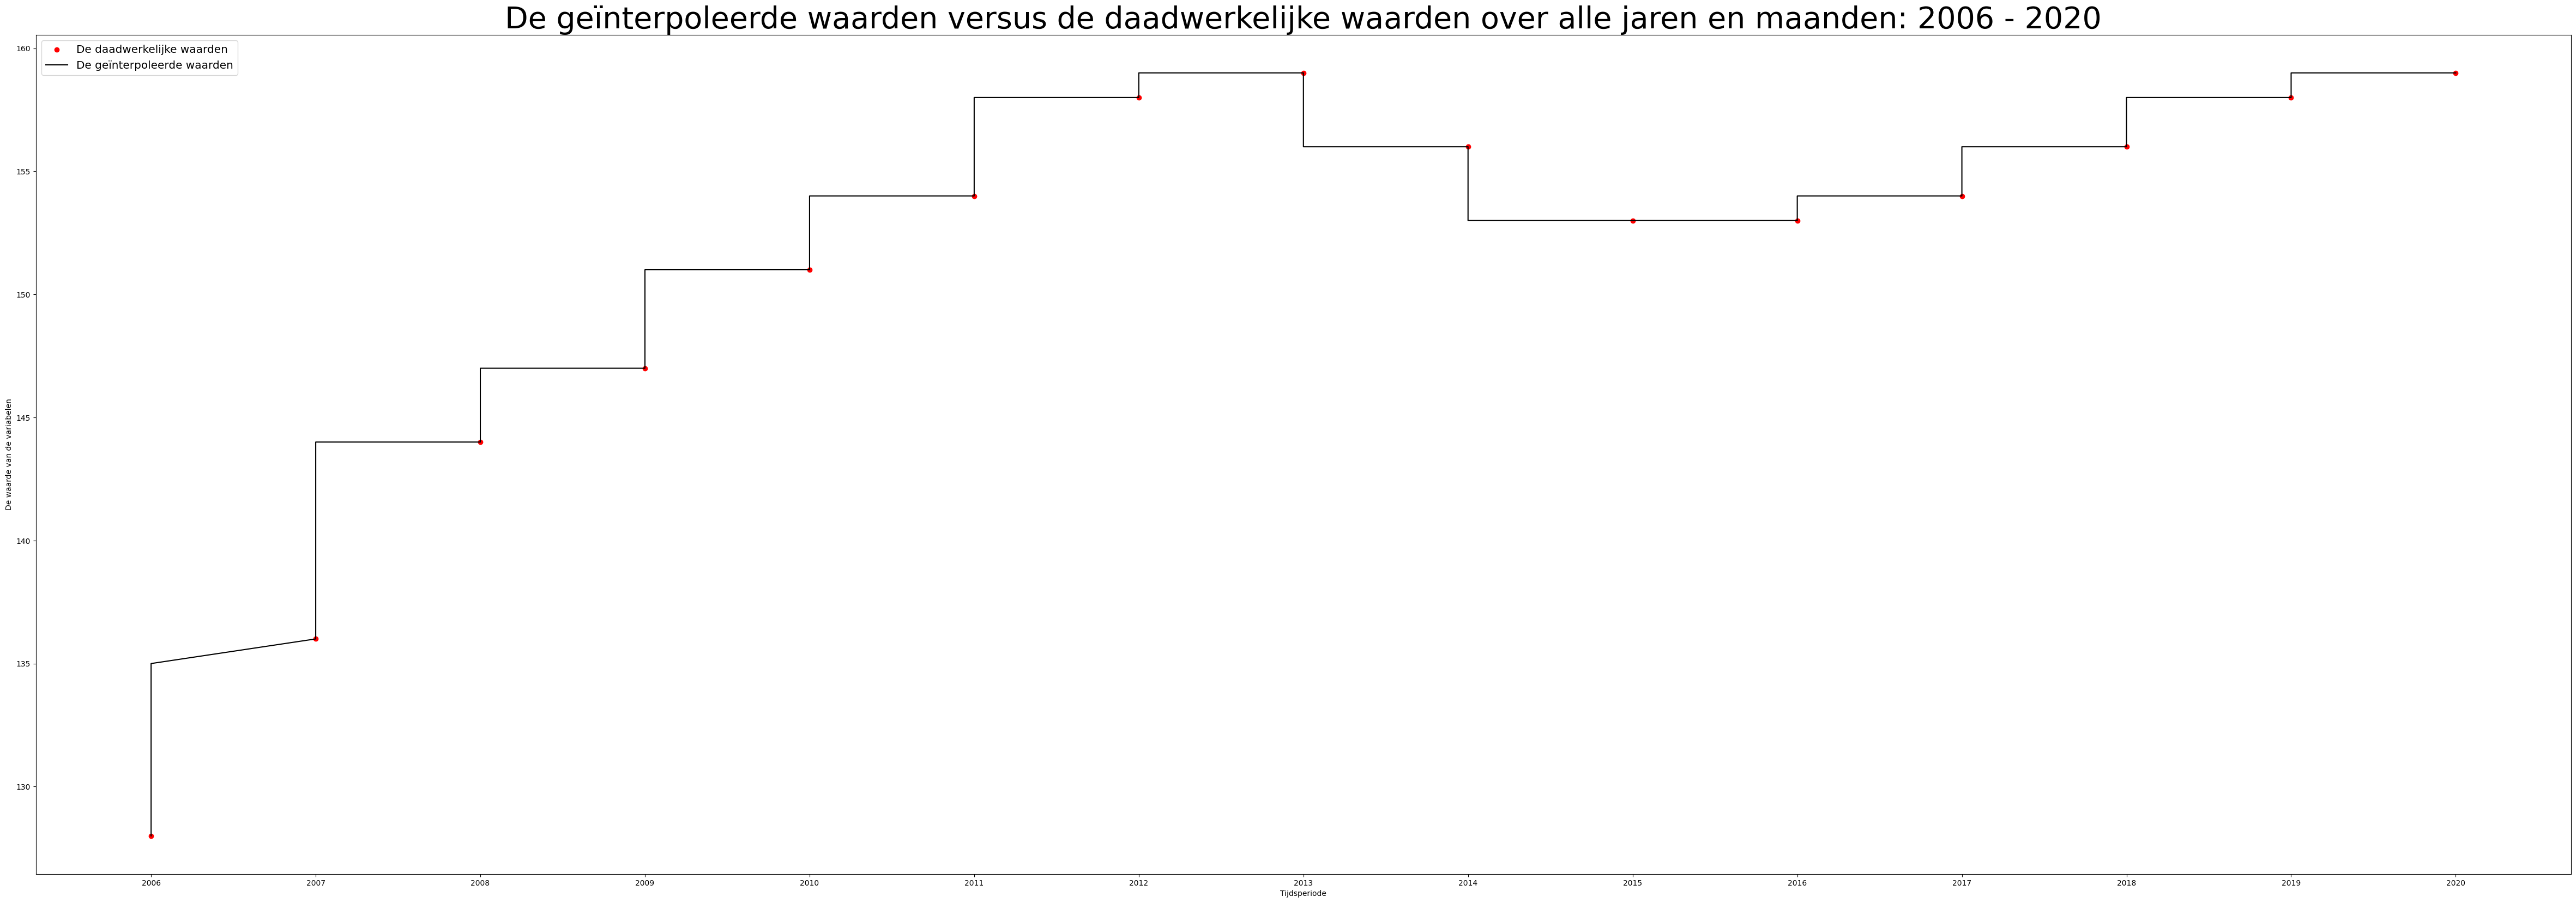

In [10]:
import matplotlib.pyplot as plt

# Dataframe 1
column1_df1 = 'Gemiddelde hypotheekschuld eigen woning'  # De gewenste kolom in het eerste dataframe
#column2_df1 = 'Gemiddelde waarde eigen woning'  # De gewenste kolom in het eerste dataframe

# Dataframe 2
column1_df2 = 'Gemiddelde hypotheekschuld eigen woning'  # De gewenste kolom in het tweede dataframe
#column2_df2 = 'Gemiddelde waarde eigen woning'  # De gewenste kolom in het tweede dataframe

# Maak een nieuwe figuur met aangepaste grootte
plt.figure(figsize=(60, 20))

# Verkrijg de x-waarden (jaar)
x_values = main_df_after_interpolation['Jaartal']

# Plot lijngrafiek (eerste plot)
plt.scatter(x_values, main_df_before_interpolation[column1_df1], color='red', label= 'De daadwerkelijke waarden')

# Plot puntengrafiek (tweede plot)
plt.plot(x_values, main_df_after_interpolation[column1_df2], color='black', label='De geïnterpoleerde waarden')

# Voeg titel, labels en legenda toe
plt.title('De geïnterpoleerde waarden versus de daadwerkelijke waarden over alle jaren en maanden: 2006 - 2020', fontsize=40)
plt.xlabel('Tijdsperiode')
plt.ylabel('De waarde van de variabelen')
plt.legend(fontsize='x-large')

# Toon de grafiek
plt.show()


**3.2 Correlatiematrix**

In de hieronder weergeven correlatiematrix is te zien welke variabelen het meest positief danwel negatief correleren (r-waarde) met de woningwaarden in Gelderland. Een r-waarde onder de 0.10 wordt ‘klein’ genoemd, tussen 0.10 en 0.30 ‘klein tot gemiddeld’, tussen 0.30 en 0.50 ‘gemiddeld tot groot’ en boven de 0.50 ‘groot’. De variabelen met r-waarden lager dan 0.10 zijn buitenbeschouwing gelaten in dit project. De aanname is dat hun impact op een voorspelmodel toch minimaal zal zijn. 

*Klein tot gemiddele correlatie*
- tussenwoning                              : r = -0.25
- hoekwoning                                : r = -0.23
- appartement                               : r = -0.26
- 2-onder-1-kap                             : r = -0.20
- Aantal_Verkochte_Woningen                 : r = -0.26
- Particuliere Huishoudens                  : r = -0.24

*Gemiddeld tot grote correlatie*
- Gemiddelde_Verkoopprijs                   : r = 0.33
- CPI in %                                  : r = 0.50
- vrijstaand                                : r = -0.30
- Noord-Holland                             : r = 0.49

*Grote correlatie* 
- Gemiddelde waarde eigen woning            : r = 0.62
- Indexcijfers_Over_Verkoopontwikkeling     : r = -0.60
- Groningen                                 : r = 0.91
- Friesland                                 : r = 0.98
- Limburg                                   : r = 0.97
- Zeeland                                   : r = 0.66
- Drenthe                                   : r = 0.98
- Overijssel                                : r = 0.95
- Flevoland                                 : r = 0.81
- Zuid-Holland                              : r = 0.82
- Noord-Brabant                             : r = 0.99
- Utrecht                                   : r = 0.81


**Financieel_Risico_Hypotheekschuld:** 

Deze variabele heeft tegen de verwachting in geen correlatie met de gemiddelde wonigwaarde in provincie Gelderland. De correlatie voor  
gemiddelde hypotheekschuld eigen woning bedraagt (r : -0,017), en wordt daarmee buiten beschouwing gelaten in de verdere analyse.

**Woningwaarde_Per_Provincie:** 

Uit de correlatiematrix valt op dat de provincies onderling sterk correleren met de gemiddelde woningwaarde in provincie Gederland.
Een prijsstijgen danwel daling in de genoemde tien provincies, is ook terug te zien in de gemiddelde woningwaarde. Om deze reden worden deze provincies meegenoomen in de verdere analyse. Al deze provincies hebben een correlatie boven r : 0.50. 

**Het Consumentenprijs Index (CPI) in %:**

Het CPI heeft een gemiddelde correlatie (r : 0.50) met de gemiddelde woningwaarde in de provincie Gelderland. Daarom wordt deze variabele niet meegenomen in de verdere analyse.

**De Verkoopprijzen over woningen:** 

Deze variabele heeft eveneens een gemiddelde correlatie (r : 0.33) met de woningwaarde in de provincie Gelderland. Dit impliceert dat de gemiddelde verkoopprijs wel effect heeft op de gemiddelde woningwaarde in de provincie Gelderland maar heeft geen grote correlatie mee. De verkoopprijs van een woning heeft schijnbaar geen doorslaggevende rol als het gaat om het verkopen van de woningen. Om deze reden wordt deze variabele niet meegenomen in de verdere anaylse. 

**Het aantal verkochte woningen:** 

Deze variabele heeft tegen de verwachting in een tot gemiddelde correlatie (r : -0.26) met de woningwaarde in Gelderland. Dit impliceert dat wanneer er meer woningen worden verkocht dat de gemiddelde wonigwaarde in de provincie Gelderland daalt en wanneer er geen of minder woningen worden verkocht dat de waarde de andere kant op gaat. 

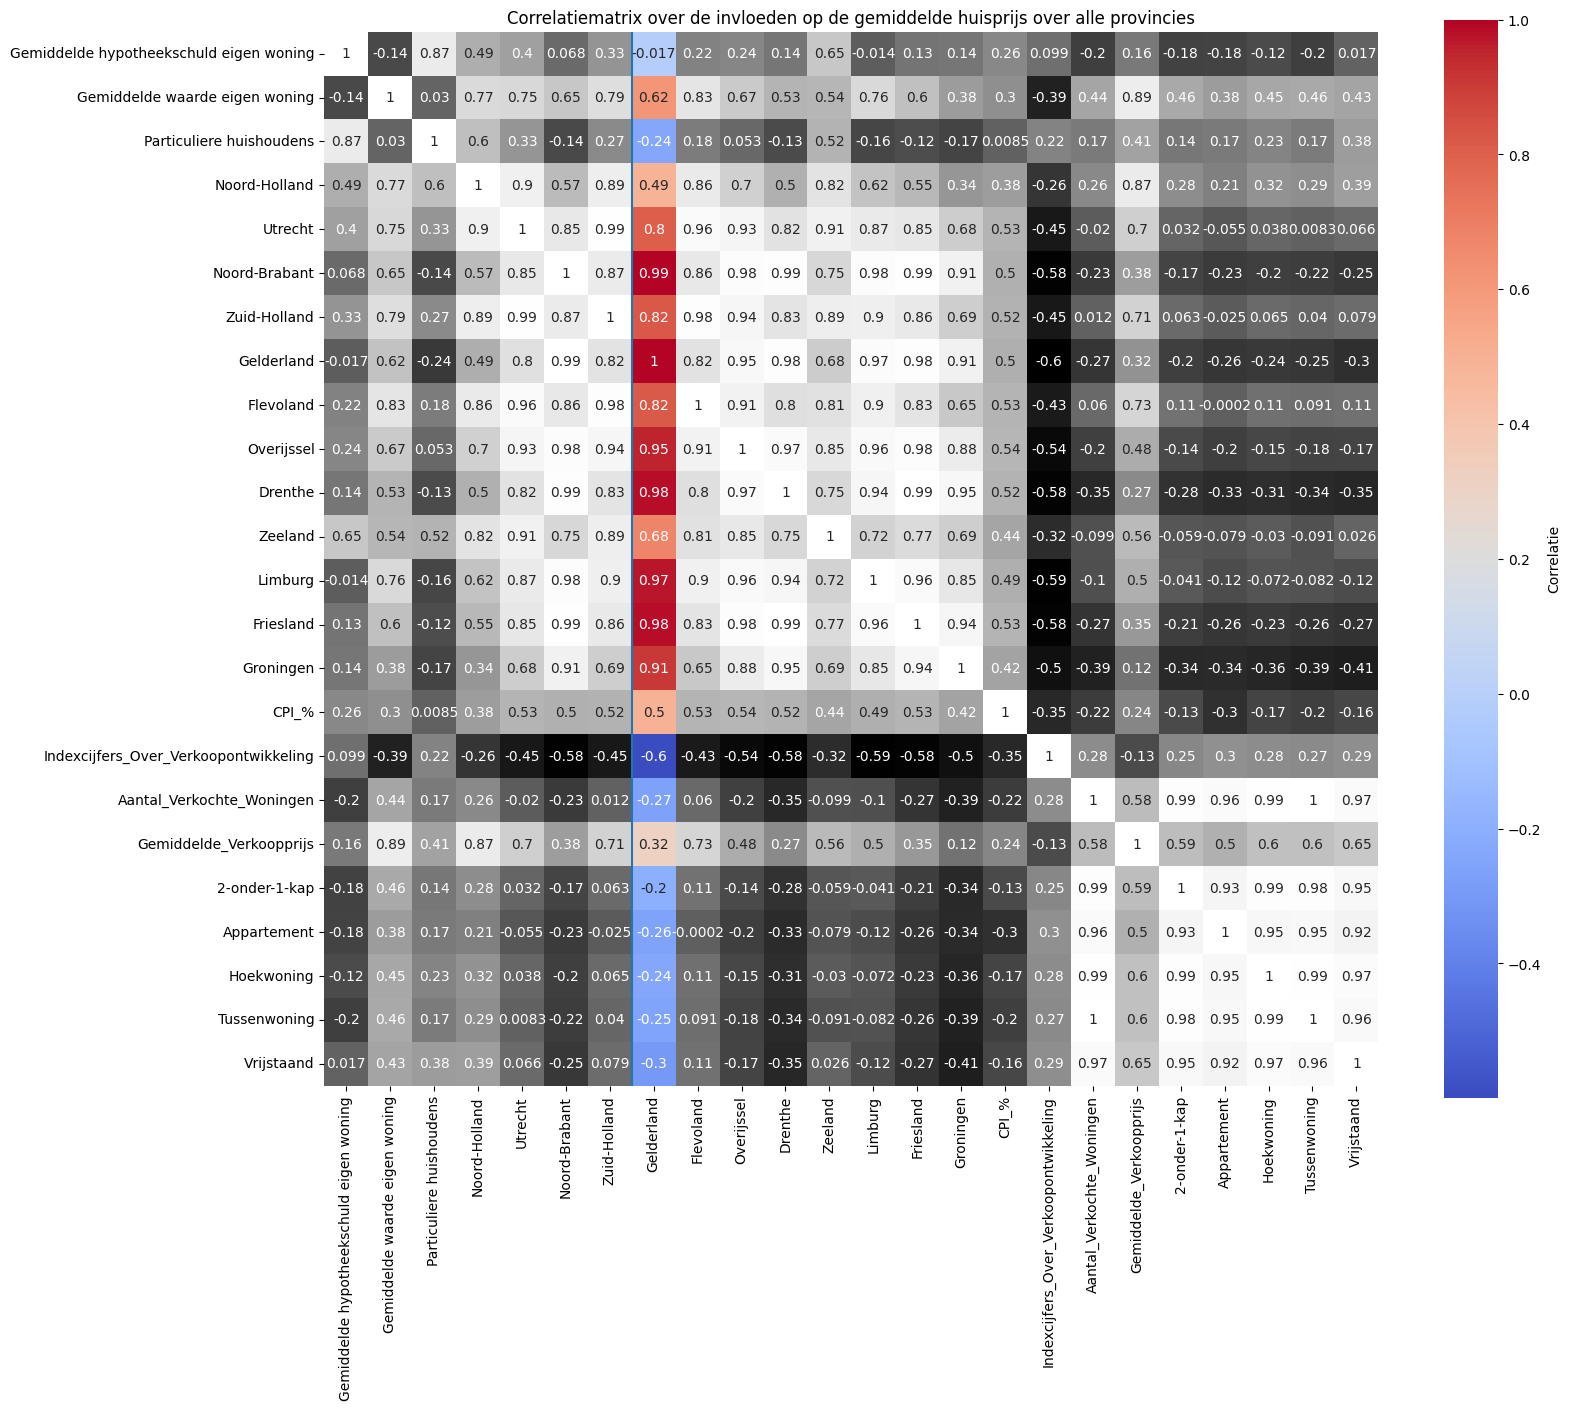

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlatiematrix
correlatiematrix = main_df_after_merged

# Dubbele kolommen worden verwijderd
columns_to_remove = ['Maand', 'Key', 'Jaartal', 'Periode (maand)']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

correlatiematrix = main_df_after_merged.drop(columns_to_remove, axis=1)

# Correlatiematrix berekenen
correlation_matrix = correlatiematrix.corr()

# Indices van de kolommen die anders moeten worden gemarkeerd, dit is in dit geval Gelderland
aangegeven_kolommen = [7]  

# Maak een masker voor de plot
mask = np.ones_like(correlation_matrix, dtype=bool)
mask[:, aangegeven_kolommen] = False

# Correlatiematrix plotten
plt.figure(figsize=(17, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, mask=mask, cbar_kws={'label': 'Correlatie', 'orientation': 'vertical', 'pad': 0.05})

# Verticale markering toevoegen aan de plot
for i in range(len(aangegeven_kolommen)):
    plt.axvline(x=aangegeven_kolommen[i])

sns.heatmap(correlation_matrix, annot=True, cmap='gray', square=True, mask=~mask, cbar=False)

plt.title('Correlatiematrix over de invloeden op de gemiddelde huisprijs over alle provincies')
plt.show()


In [14]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
correlatiematrix.to_excel(desktop_path + 'Python_test.xlsx', index=False)

**3.3 Variance Inflation Factor**

Een hoge VIF (Variance Inflation Factor) score geeft aan dat er sprake is van hoge multicollineariteit in de gegevens. Multicollineariteit verwijst naar de sterke correlatie tussen voorspellende variabelen in een regressiemodel. Wanneer multicollineariteit aanwezig is, wordt het moeilijk om de individuele effecten van de voorspellende variabelen op de afhankelijke variabele te isoleren (Tulabandu, 2021).

Interpretatie van VIF-scores:
VIF = 1: Geen multicollineariteit. De variabele vertoont geen correlatie met andere voorspellende variabelen.
VIF tussen 1 en 5: Matige multicollineariteit. De variabele heeft enige correlatie met andere voorspellende variabelen, maar het is niet ernstig.
VIF boven 5: Hoge multicollineariteit. De variabele vertoont een hoge correlatie met andere voorspellende variabelen, en de schattingen van de coëfficiënten kunnen onbetrouwbaar zijn.

Aangezien alle waarden tussen 0 en 1.6 vallen, is er in dit geval geen reden om de variabelen te isoleren danwel samenvoegen. Alle groot correlerende variabelen worden meegenomen bij de modelleringstap. 


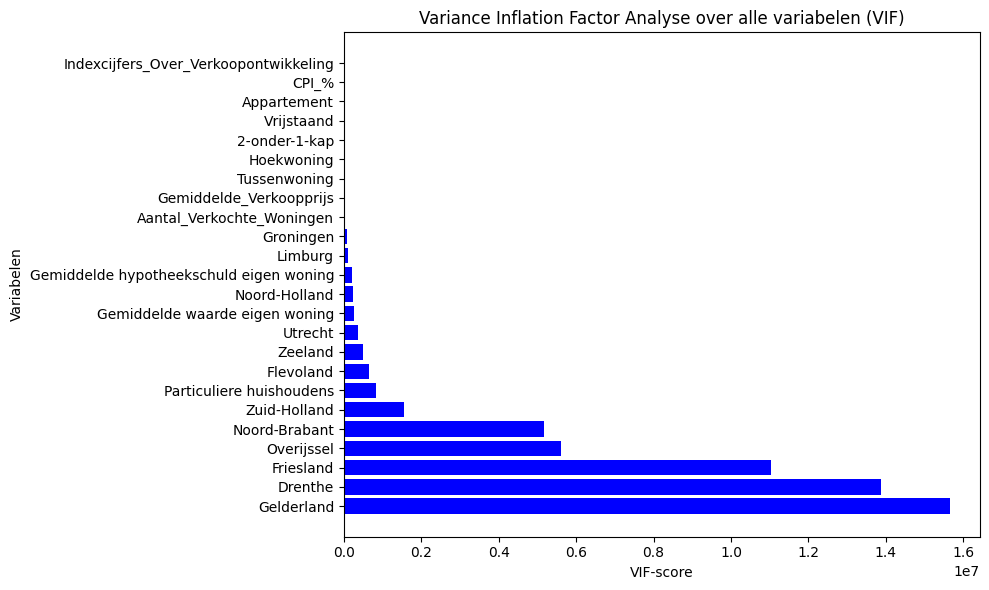

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for all columns in the dataframe
vif = pd.DataFrame()
vif["Variabelen"] = correlatiematrix.columns
vif["VIF-score"] = [variance_inflation_factor(correlatiematrix.values, i) for i in range(len(correlatiematrix.columns))]

# Sort the dataframe by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF-score", ascending=False)

# Plot VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_sorted["Variabelen"], vif_sorted["VIF-score"], color="blue")
plt.xlabel("VIF-score")
plt.ylabel("Variabelen")
plt.title("Variance Inflation Factor Analyse over alle variabelen (VIF)")
plt.tight_layout()
plt.show()

**3.4 De Normalisering van de waarden**

De waarden van de variabelen onderling lopen sterk uiteen van elkaar. Om het werken met deze variabelen makkelijker te maken, zijn de waarden genormaliseerd. Voor het normaliseren is er gebruik gemaakt van de functie min-max. Dit wil zeggen dat de waarden onderverdeeld zijn tussen 0 en 1. Hierdoor wordt het makkelijker om in het volgende stuk boxplotten te maken om outliers van alle variabelen inzichtelijk te maken.

In [13]:
# Normaliseren van kolomwaarden
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Min-Max normalisatie toepassen
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(correlatiematrix)

# Genormaliseerde gegevens omzetten naar DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=correlatiematrix.columns)

In [16]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
normalized_df.to_excel(desktop_path + 'Python_test.xlsx', index=False)

**3.5 Het identificeren van de outliers**

In de hieronder weergeven boxplots is te zien dat de variabelen over enige utischieters beschikken. In dit geval is er voor alle variabelen een boxplot gemaakt. Deze uitschieters worden op dit moment niet weggenomen of vervangen met een andere waarde op dit moment. De reden is dat dit gevolgen kan hebben voor de modellering. In de eerste instantie wordt de modellering inclusies de outliers gemaakt omdat het nog onbekend is of het wegnemen van de outlier ook daadwerkelijk de accuratesse van het model beinvloedt. 

In [25]:
import pandas as pd
import plotly.express as px

#Boxplots over de variabelen met *klein tot gemiddele correlatie*
df_low = pd.DataFrame({
    'Gelderland': normalized_df['Gelderland'],
    'Tussenwoning': normalized_df['Tussenwoning'],
    'Hoekwoning': normalized_df['Hoekwoning'],
    'Appartement': normalized_df['Appartement'],
    '2-onder-1-kap': normalized_df['2-onder-1-kap'],
    'Aantal_Verkochte_Woningen': normalized_df['Aantal_Verkochte_Woningen'],
    'Particuliere huishoudens': normalized_df['Particuliere huishoudens']
})

# Er wordt een interactieve boxplot met behulp van Plotly Express gemaakt
fig = px.box(df_low, title='Interactieve Boxplot over de variabelen met klein tot gemiddele correlatie met de gemiddelde huisprijs in Gelderland')
fig.update_layout(showlegend=False)  # Verberg de legende
fig.show()

#Boxplots over de variabelen met gemiddeld tot grote correlatie
df_medium = pd.DataFrame({
    'Gelderland': normalized_df['Gelderland'],
    'Gemiddelde_Verkoopprijs': normalized_df['Gemiddelde_Verkoopprijs'],
    'Vrijstaand': normalized_df['Vrijstaand'],
    'Noord-Holland': normalized_df['Noord-Holland']
})

# Er wordt een interactieve boxplot met behulp van Plotly Express gemaakt
fig = px.box(df_medium, title='Interactieve Boxplot over de variabelen met gemiddeld tot grote correlatie met de gemiddelde huisprijs in Gelderland')
fig.update_layout(showlegend=False)  # Verberg de legende
fig.show()

#Boxplots over de variabelen met grote correlatie
df_high = pd.DataFrame({
    'Gelderland': normalized_df['Gelderland'],
    'Gemiddelde waarde eigen woning': normalized_df['Gemiddelde waarde eigen woning'],
    'Indexcijfers_Over_Verkoopontwikkeling': normalized_df['Indexcijfers_Over_Verkoopontwikkeling'],
    'Groningen': normalized_df['Groningen'],
    'Friesland': normalized_df['Friesland'],
    'Limburg': normalized_df['Limburg'],
    'Zeeland': normalized_df['Zeeland'],
    'Drenthe': normalized_df['Drenthe'],
    'Overijssel': normalized_df['Overijssel'],
    'Flevoland': normalized_df['Flevoland'],
    'Zuid-Holland': normalized_df['Zuid-Holland'],
    'Noord-Brabant': normalized_df['Noord-Brabant'],
    'Utrecht': normalized_df['Utrecht']
})

# Er wordt een interactieve boxplot met behulp van Plotly Express gemaakt
fig = px.box(df_high, title='Interactieve Boxplot over de variabelen met grote correlatie met de gemiddelde huisprijs in Gelderland')
fig.update_layout(showlegend=False)  # Verberg de legende
fig.show()



**3.5 Het identificeren van de outliers**

*Interactieve Lijngrafieken over de verhouding tussen de variabelen*

Bij de visualisatie van de variabelen worden enkel de grote correlaties meegenomen. Dit wil zeggen de variabelen met correlatie van boven de r = 0.50 met de gemiddelde woningwaarde in de provincie Gelderland. De reden hiervan is reeds in het vorige hoofdstuk aangegeven; deze variabelen maken deel uit van het voorspelmode. Dit volgt in hoofdstuk vijf. 

*Grote correlatie* 
- Gemiddelde waarde eigen woning            : r = 0.62
- Indexcijfers_Over_Verkoopontwikkeling     : r = -0.60
- Groningen                                 : r = 0.94
- Friesland                                 : r = 0.98
- Limburg                                   : r = 0.97
- Zeeland                                   : r = 0.66
- Drenthe                                   : r = 0.98
- Overijssel                                : r = 0.95
- Flevoland                                 : r = 0.81
- Zuid-Holland                              : r = 0.82
- Noord-Brabant                             : r = 0.99
- Utrecht                                   : r = 0.81

Met de interactieve visualisatie is veel mogelijk maar geconcludeerd kan worden dat op één variabele na de overigen met de gemiddelde woningwaarde in provincie Gelderland gelijklopen. Dit wil zeggen dat wanneer een stijging danwel een daling in die gemiddelde woningwaarde is, dat een dergelijke stijging danwel daling ook in de genoemde variabele is. De variabele Indexcijfers_Over_Verkoopontwikkeling heeft een negatieve correlatie van r : -0.60 met de gemiddelde woningwaarde. Dit wil zeggen dat een stijging een daling bij de andere variabele betekent en vice versa. Dit is ook goed te zien in de onderstaande twee grafieken. De waarden lopen niet gelijk. 

In [26]:
import pandas as pd

# Dataframe met jaartallen en maanden

""" 
Deze functie heeft als doel om twee kolommen te maken en met eentje het jaartal en de andere de maanden. 
Deze kolommen zijn belangrijk om de dataframes laten met elkaar te kunen mergen. 

"""
def create_year_month_dataframe():
    years = list(range(2006, 2021))
    months = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']
    dates = []

    for year in years:
        for month in months:
            dates.append(f"{year} {month}")

    df = pd.DataFrame({'Datum': dates})
    return df

# Gebruik de functie om een DataFrame te maken
Jaartal_maand = create_year_month_dataframe()

# Splits het woord en het getal in aparte kolommen
Jaartal_maand[['Jaartal', 'Maand']] = Jaartal_maand['Datum'].str.split(n=1, expand=True)

# specifieke kolommen 'Jaartal' en 'Maand' worden met met loc geselecteerd
Jaartal_maand = Jaartal_maand.loc[:, ['Jaartal', 'Maand']]

# Voeg de kolom 'Jaartal_Maand' toe aan de dataframe normalized_df
normalized_df['Jaartal_Maand'] = Jaartal_maand['Jaartal'] + ' ' + Jaartal_maand['Maand']

# Maak nieuwe kolommen 'Jaar' en 'Maand' in normalized_df
normalized_df[['Jaar', 'Maand']] = normalized_df['Jaartal_Maand'].str.split(n=1, expand=True)

# dubbele kolommen worden verwijderd
columns_to_remove = ['Jaartal_Maand', 'Maand']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

normalized_df = normalized_df.drop(columns_to_remove, axis=1)

In [27]:
import plotly.express as px

# Maak een lijngrafiek van alle kolommen in normalized_df
fig = px.bar(normalized_df, x='Jaar', y=normalized_df.columns)

# Instellingen voor de grafiek
fig.update_layout(
    title='Een interactieve visualisatie van de genormaliseerde waarden van alle variabelen over de jaren heen',
    xaxis_title='Jaar',
    yaxis_title='Waarden',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='right',
        x=1
    )
)

# Toon de grafiek
fig.show()

In [17]:
import plotly.graph_objects as go

# Verwijder de kolom 'Jaar' uit de dataframe
normalized_df_without_year = normalized_df.drop('Jaar', axis=1)

fig = go.Figure()

for column in normalized_df_without_year.columns:
    fig.add_trace(go.Bar(x=normalized_df['Jaar'], y=normalized_df[column], name=column))

fig.update_layout(title='Een interactieve visualisatie van de genormaliseerde waarden van alle variabelen over de jaren heen', xaxis_title='Jaar', yaxis_title='De genormaliseerde waarden')
fig.show()

In [ ]:
# Pad naar het bureaublad
desktop_path = '~/Desktop/'

# Exporteer DataFrame naar Excel-bestand op het bureaublad
main_df_after_interpolation.to_excel(desktop_path + 'Python_test.xlsx', index=False)

## **4 Modelling** ##

In dit hoofdstuk komt de moddeleringsstap aan bod. In deze stap wordt gekeken naar welk model of modellen zich lenen om een accurate voorspelling over de gemiddelde woningwaarde in provincie Gelderland te doen. 

** Random Forrest Regressor als het gekozen voorspelmodel **

Om de gemiddelde woningwaarde voor provincie Gelderland te voorspellen wordt aanbevolen om gebruik te maken van het Random Forrest Regressor. Dit model heeft tweetal technieken te weten; ensemble en bagging. 

Ensemble van beslissingsbomen: Een Random Forest Regressor bestaat uit een ensemble van beslissingsbomen. Elke boom wordt afzonderlijk getraind op een subset van de trainingsdata. Bagging: Bij het trainen van elke beslissingsboom wordt een subset van de trainingsdata willekeurig gekozen met herhaling. Dit proces staat bekend als bagging (bootstrap aggregating). Door gebruik te maken van verschillende subsets van de data, kan de random forest een betere generalisatiecapaciteit hebben en overfitting verminderen. Juist bij een tijdreeksanalyse als deze is overfitting een risico en met de inzet van dit model wordt de kans verkleind. 

Random feature selectie: Bij het maken van elke splitsing in een beslissingsboom wordt slechts een subset van de beschikbare features willekeurig geselecteerd. Deze subset wordt gebruikt om de beste splitsing te bepalen. Dit helpt om correlaties tussen features te verminderen en zorgt voor diversiteit tussen de bomen. In dit geval worden de variabelen die hoog gecorreleerd hebben met de gemiddelde woningwaarde in Gelderland als feautres gebruikt. Om dit mogelijk te maken wordt de data in een train en een testdataset omgezet. De trainset wordt gebruikt om het model te trainen en de testset wordt gebruikt om het model te evalueren. 

** ARIMAX als het gekozen voorspelmodel **

ARIMAX (Autoregressive Integrated Moving Average with Exogenous Variables) is een tijdreeksmodel dat de gemiddelde woningwaarde voorspelt door ARIMA-componenten te combineren met exogene variabelen. Het model is geschikt voor tijdreeksgegevens waarbij de gemiddelde woningwaarde voor de provincie Gelderland wordt beïnvloed door externe variabelen. In dit geval zijn dat de variabelen die hoog gecorrleerd zijn.  Het analyseert historische gegevens en exogene variabelen om betrouwbare voorspellingen en inzicht in de invloed van externe factoren te bieden.

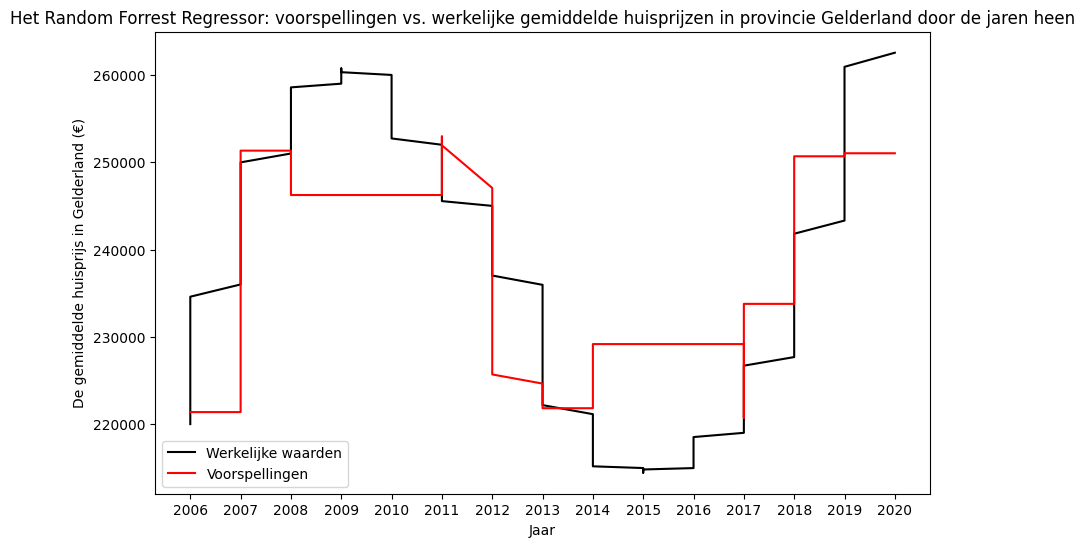

     Jaar  Werkelijke waarden  Voorspellingen  Afwijking (%)
9    2006            231780.0       229193.34      -1.115998
19   2007            245387.0       242722.43      -1.085864
18   2007            244128.0       241912.13      -0.907667
12   2007            236000.0       232659.49      -1.415470
16   2007            241508.0       238627.04      -1.192905
15   2007            240158.0       238145.71      -0.837903
24   2008            251000.0       249630.53      -0.545606
31   2008            256496.0       254245.47      -0.877413
29   2008            255191.0       253548.66      -0.643573
30   2008            255867.0       253688.73      -0.851329
45   2009            260683.0       260655.36      -0.010603
42   2009            260653.0       260559.47      -0.035883
55   2010            255778.0       256650.19       0.340995
56   2010            255015.0       255971.53       0.375088
51   2010            258539.0       258607.25       0.026398
60   2011            252

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inlezen van de dataset
data = main_df_after_merged

# Selecteren van de features en de target variabele
X = data[['Indexcijfers_Over_Verkoopontwikkeling', 'Groningen', 'Friesland', 'Limburg', 'Zeeland', 'Drenthe', 'Overijssel', 'Flevoland', 'Zuid-Holland', 'Noord-Brabant', 'Utrecht', 'CPI_%']]
y = data['Gelderland']
jaar = data['Jaartal']

# Sorteren van een Jaartallen in DataFrame van laag naar hoog
#data = data.sort_values('Jaartallen')

# Instantie van de Random Forest Regressor maken met regularisatieparameters
rf_regressor = RandomForestRegressor(n_estimators=90, max_depth=20, min_samples_split=20, min_samples_leaf=30, random_state=10)

# Voorspellingen maken met cross-validatie
y_pred = cross_val_predict(rf_regressor, X, y, cv=5)

# Grafiek van de voorspellingen en werkelijke waarden
plt.figure(figsize=(10, 6))
plt.plot(jaar, y, '', label='Werkelijke waarden', color='black')
plt.plot(jaar, y_pred, label='Voorspellingen', color='red')
plt.xlabel('Jaar')
plt.ylabel('De gemiddelde huisprijs in Gelderland (€)')
plt.title('Het Random Forrest Regressor: voorspellingen vs. werkelijke gemiddelde huisprijzen in provincie Gelderland door de jaren heen')
plt.legend()
plt.show()

# Tabel met de voorspellingen, werkelijke waarden en afwijking in percentage
results_df = pd.DataFrame({'Jaar': jaar_test_sorted, 'Werkelijke waarden': y_test_sorted.values, 'Voorspellingen': y_pred_sorted, 'Afwijking (%)': afwijking_pct})
print(results_df)

# Evalueren van de regressor met behulp van de Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Voorspellingen maken met cross-validatie
y_pred = cross_val_predict(rf_regressor, X, y, cv=5)

# Definieer een tolerantie voor correcte voorspellingen
tolerance = 0.05 * y.mean()  # +/- 5% van de gemiddelde waarde van y

# Bepaal de nauwkeurigheid van de voorspellingen
correct_predictions = abs(y_pred - y) <= tolerance
accuracy = sum(correct_predictions) / len(correct_predictions) * 100

print("Nauwkeurigheid: {:.2f}%".format(accuracy))


## **5 Evaluation** ##

In dit hooofdstuk komt de evaluatie aan bod. 

In hoofdstuk drie kwamen er twaalf variabelen waarmee de gemiddelde woningwaarde in provincie Gelderland hoog positief danwel negatief gecorreleerd. Dit zijn: De gemiddelde waarde eigen woning (r = 0.62), Indexcijfers_Over_Verkoopontwikkeling (r = -0.60), Groningen (r = 0.91), Friesland (r = 0.98),
Limburg (r = 0.97), Zeeland (r = 0.66), Drenthe (r = 0.98), Overijssel (r = 0.95), Flevoland (r = 0.81), Zuid-Holland (r = 0.82), Noord-Brabant (r = 0.99) en  Utrecht (r = 0.81).

Verder is er in hoofdstuk vier tweetal modellen ontwikkeld en getraind om een voorspelling over de gemiddelde woningwaarde voor de provincie Gelderland te doen. Het eerste model, Random Forrest Regressor, voorspelt voor 69% deze waarde accuraat. Het tweede model, het ARIMAX-tijdreeksanalyse, daarintegen voorspelt deze waarde voor 75% accuraat. Ondanks dat de nauwkeurigheid nog verder omhoog moet, geven deze percentages toch enige houvast of de waarde stijgt danwel daalt in een maand binnen het jaar. 

Het onderzoek was begonnen met de businessvraag: 

*"Welke variabelen correleren het hoogst met de gemiddelde woningwaarde in de provincie Gelderland, om teneinde deze variabelen in een voorspelmodel te integreregen om zodanig de gemiddelde woningwaarde per maand te kunnen voorspellen?"*

Met het bovenstaande is de eerder opgestelde businessvraag beantwoord. 

## **6 Deployment** ##

In het vorige hoofdstuk is te zien welke modellen er gebruikt worden om de gemiddelde woningwaarde per maand voor de provincie Gelderland te kunnen voorspellen. In dit hoofdstuk komen onder andere de stappen die het model (nog) accurater dienen te maken en daarnaast het op welke wijze geimplementeerd kan worden. 

Allereerst is het van belang om de hoog correlererende variabelen mee te nemen en op een complete dataset toe te passen. Dit wil zeggen dat de jaren na corona mee worden genomen. Het advies is om aan de data tot en met januari 2020 de data vanaf januari 2022 toe te voegen. Er wordt dus twee jaar data buiten beschouwing gelaten. De reden; de COVID-19 effecten worden dan buiten beschouwing gelaten. Het model met de data uit deze twee jaren te trainen kan tot minder accurate voorspelling leiden. 

Vervolgen is het dan de bedoeling om naast de hoog correlerende variabelen de gemiddeld tot laag correlerende variabelen mee te nemen in de modellen en mee te experimenteren of dat voor een verhoging danwel een verlaging zorgt in accuratesse. Dan is het ook nog interessant om te kijken of het weghalen van de outliers ook enig effect op de accuratesse heeft. 

Ten slotte kan of kunnen de gekozen voorspelmodellen in de vorm van een dashboard worden gevisualiseerd en weergeven. Deze dashboard kan in python schript worden geschreven en daarna, gebruiksvriendelijk en interactief, worden gevisualiseerd. De bedoeling ervan is dat men niet alle stappen dient automatisch dienen te verlopen en met één klik ververst kan worden in de dashboard. Ook moet het mogelijk zijn dat een gebruiker x aantal maanden en of jaren kan opgeven en dat het voorspelmodel automatisch de analyse uitvoert en tot een waarde uitkomt. 

## **Literatuurlijst** ##


Amstelveens Nieuwsblad. (2023). Starters vinden het steeds lastiger om een huis te kopen. Geraadpleegd van https://www.amstelveensnieuwsblad.nl/lokaal/partnercontent/908936/starters-vinden-het-steeds-lastiger-om-een-huis-te-kopen

Business Insider. (2022). Hypotheekrente in Nederlandse provincies stijgt het hardst in Flevoland en Drenthe - en dit zijn de grootste hypotheekverschillen per provincie. Geraadpleegd op [09-06-2023], van https://www.businessinsider.nl/hypotheek-provincie-oversluiten-huizenprijs-2022/

Kadasterdata. (2023). Gemiddelde huizenprijs in Gelderland met 8,5% gestegen. Geraadpleegd op 10 juni 2023, van https://www.kadasterdata.nl/provincies/gelderland#:~:text=De%20gemiddelde%20huizenprijs%20is%20%E2%82%AC,met%208%2C5%25%20gestegen

RTL Nieuws. (2023). WOZ-waarde stijging 17 procent: Belastingen, OZB en hypotheekrente. Geraadpleegd van https://www.rtlnieuws.nl/nieuws/nederland/artikel/5368675/woz-waarde-stijging-17-procent-belastingen-ozb-hypotheekrente

Tulabandu, A. (2021). Multi-Collinearity in Regression. Towards Data Science. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

## **Bijlagen** ##


Link naar de betreffende dataframes: 

Centraal Bureau voor de Statistiek (CBS). (n.d.). Financieel risico hypotheekschuld; eigenwoningbezitters. Geraadpleegd op [17-06-2023], van https://www.cbs.nl/nl-nl/cijfers/detail/85162NED

Centraal Bureau voor de Statistiek. (2023). Consumentenprijzen; prijsindex 2015=100. Geraadpleegd van https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83131ned/table?fromstatweb

Kadaster. (2023). Aantal woningen. Geraadpleegd op 12 juni 2023, van https://www.kadaster.nl/zakelijk/vastgoedinformatie/vastgoedcijfers/vastgoeddashboard/aantal-woningen

